<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/7_early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=250,noise=0.1,random_state=42)

In [9]:
X[:0]

array([], shape=(0, 2), dtype=float64)

<Axes: >

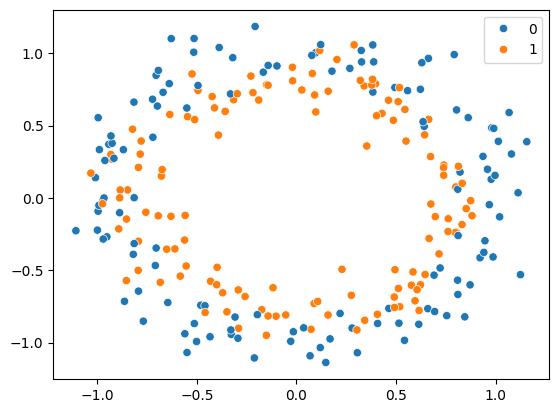

In [11]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.4685 - loss: 0.7044 - val_accuracy: 0.4750 - val_loss: 0.6928
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4378 - loss: 0.6975 - val_accuracy: 0.6000 - val_loss: 0.6917
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5054 - loss: 0.6934 - val_accuracy: 0.5250 - val_loss: 0.6916
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5926 - loss: 0.6888 - val_accuracy: 0.5500 - val_loss: 0.6913
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5293 - loss: 0.6886 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5593 - loss: 0.6834 - val_accuracy: 0.5500 - val_loss: 0.6925
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5484 - loss: 0.6884 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5623 - loss: 0.6814 - val_accuracy: 0.5750 - val_loss

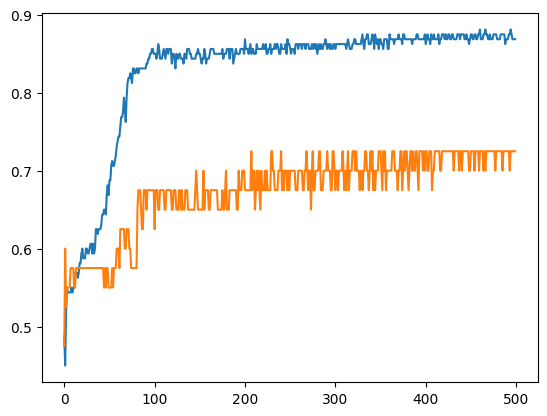

In [17]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.show()

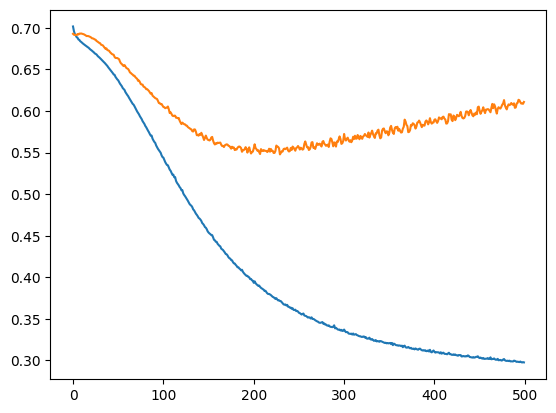

In [18]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

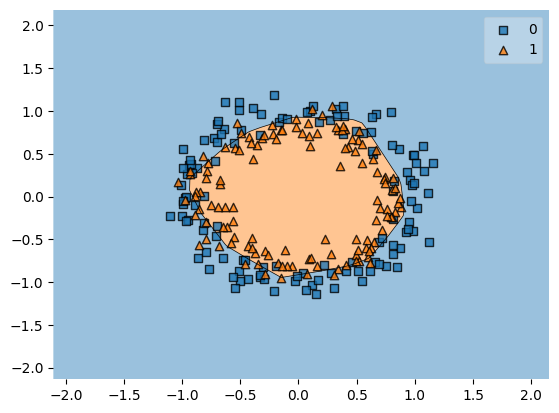

In [19]:
plot_decision_regions(X,y,model)

In [25]:
model1=Sequential()

In [26]:
model1.add(Dense(256,activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(1,activation='sigmoid'))

In [27]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
callback=EarlyStopping(monitor='val_loss',patience=15,min_delta=0.0001)

In [32]:
history1=model1.fit(X_train,y_train,validation_split=0.2,epochs=500,callbacks=callback)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4757 - loss: 0.6951 - val_accuracy: 0.4750 - val_loss: 0.6894
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4681 - loss: 0.6937 - val_accuracy: 0.5250 - val_loss: 0.6905
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5550 - loss: 0.6872 - val_accuracy: 0.5250 - val_loss: 0.6900
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4921 - loss: 0.6880 - val_accuracy: 0.5250 - val_loss: 0.6906
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5242 - loss: 0.6874 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5405 - loss: 0.6848 - val_accuracy: 0.5500 - val_loss: 0.6922
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5575 - loss: 0.6810 - val_accuracy: 0.5750 - val_loss: 0.6932
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4806 - loss: 0.6913 - val_accuracy: 0.5750 - val_loss:

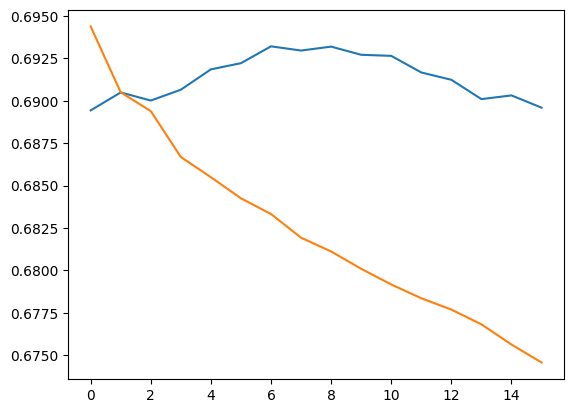

In [33]:
sns.lineplot(history1.history['val_loss'])
sns.lineplot(history1.history['loss'])
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


<Axes: >

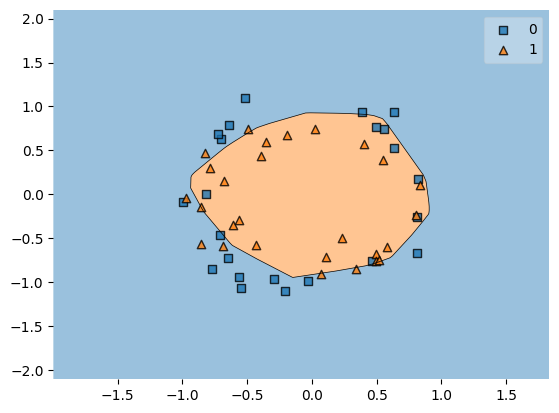

In [34]:
plot_decision_regions(X_test,y_test,clf=model)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

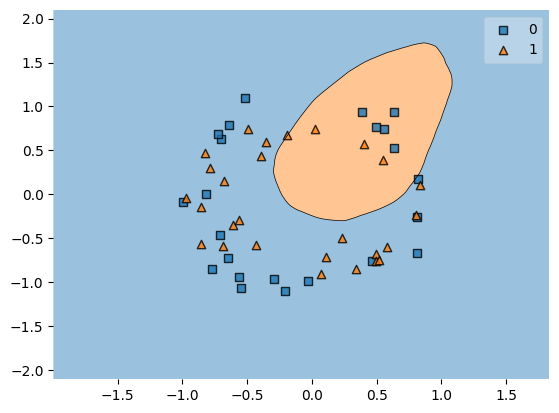

In [35]:
plot_decision_regions(X_test,y_test,clf=model1)